In [1]:
import Thymio as th
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Data storage for plotting
Vleftdata, Vrightdata = [], []
iteration_times = []
vars_towait = ['prox.horizontal','motor.right.speed','motor.left.speed','motor.right.target','motor.right.target']

speed_robot=200

print("Open thymio")
thymio = th.Thymio()
await thymio.initiateLock()
print("Thymio opened")




Open thymio
Thymio opened


In [3]:
start_time = time.time()

thymio.set_multiple_variables({"motor.left.target":[speed_robot],"motor.right.target":[speed_robot]})

while True:
    thymio.wait_for_variables(vars_towait)
    
    Vleft = thymio.getSpeedL()
    Vright = thymio.getSpeedR()

    Vleftdata.append(Vleft)
    Vrightdata.append(Vright)

    if time.time() - start_time  > 20:
        thymio.set_multiple_variables({"motor.left.target":[0],"motor.right.target":[0]})
        print("finished")
        break

{'motor.left.target': [200], 'motor.right.target': [200]}
{'motor.left.target': [0], 'motor.right.target': [0]}
finished


In [23]:
thymio.set_multiple_variables({"motor.left.target":[0],"motor.right.target":[0]})


{'motor.left.target': [0], 'motor.right.target': [0]}


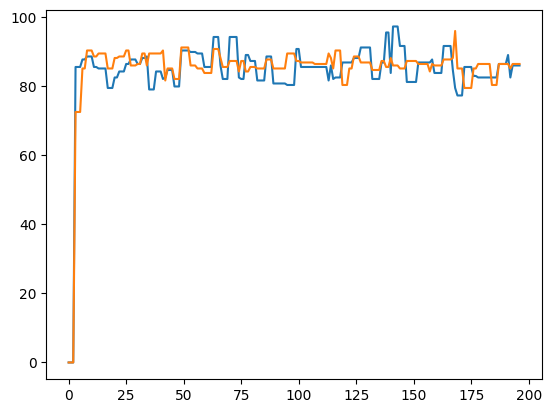

In [4]:
Vleftdata = np.array(Vleftdata)
Vrightdata = np.array(Vrightdata)

V = (Vleftdata + Vrightdata)/2

theta_dot = (Vleftdata - Vrightdata)/2

plt.plot(Vrightdata)
plt.plot(Vleftdata)



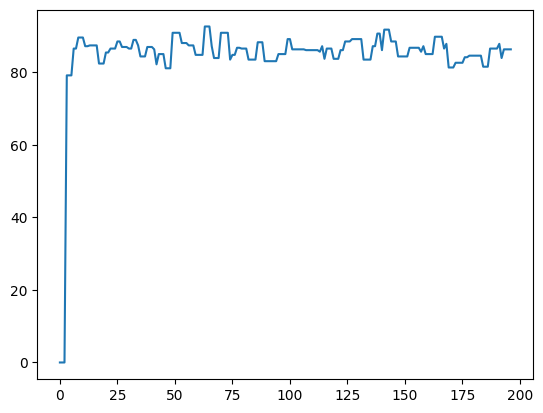

In [5]:
plt.plot(V)


In [9]:
np.mean(V)

84.81350695210767

In [11]:
(203/3)/np.mean(V)

0.7978288965798402

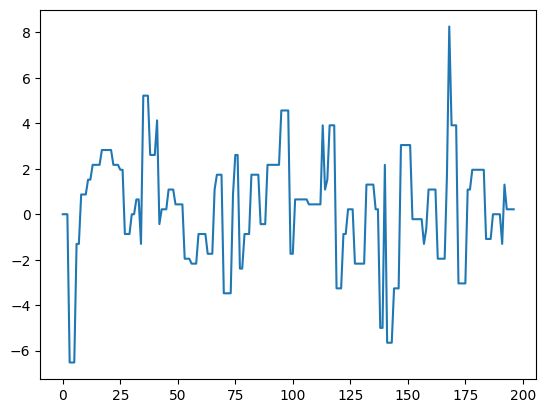

In [7]:
plt.plot(theta_dot)

In [8]:
print(np.mean(theta_dot))

0.2758772897815059
